# Day 9


# Machine Learning with kNN  

# Intro to k-Nearest Neighbors in Scikit-learn



What is it?

kNN works by memorizing the training examples/data points the algorithm is going to identify the closest neighbors in terms of distance

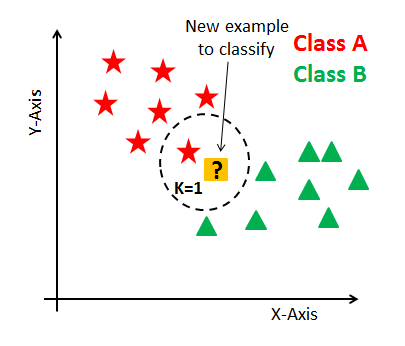

# How do we determine which points are closer?

Answer: Distance Formula!

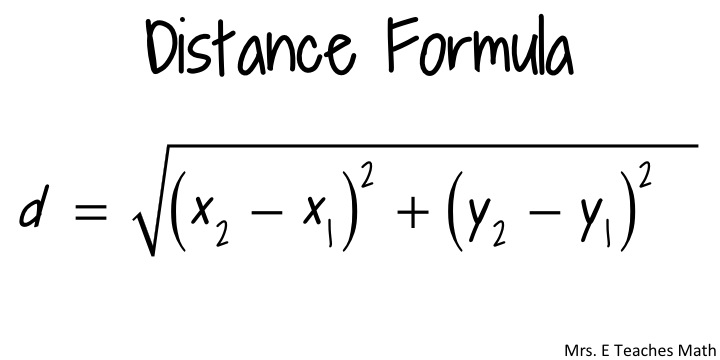

# Machine Learning Process

## 1. Load the Dataset

In [1]:
import pandas as pd

In [3]:
fruits = pd.read_csv("fruits_data.csv")

In [4]:
fruits = fruits[['weight', 'width', 'height', 'fruit']]

In [5]:
fruits.head()

,weight,width,height,fruit
0,5.1,2.625,2.375,apple
1,7.6,3.000,3.250,apple
2,5.0,2.500,3.000,apple
3,7.4,9.500,3.250,apple
4,7.4,3.400,3.100,apple


## 2. Explore the data with visualizations

In [6]:
import plotly.express as px

In [7]:
fig = px.scatter(fruits, x="width", y="height", size="weight", color="fruit",
                 color_discrete_sequence  = ["#e63c30", "#e6be30", "#f09218"],
                 labels={"width" : "Width", "height" : "Height"},
                 title = "Fruits Dataset", size_max=15)

fig.show()

## 3. Split the Data for training and testing

In [9]:
# for knn()
from sklearn.neighbors import KNeighborsClassifier
# for splitting up the data
from sklearn.model_selection import train_test_split

In [10]:
# create features
features = fruits[['weight', 'width', 'height']]

In [12]:
features.head()

,weight,width,height
0,5.1,2.625,2.375
1,7.6,3.000,3.250
2,5.0,2.500,3.000
3,7.4,9.500,3.250
4,7.4,3.400,3.100


In [11]:
# create target
target = fruits["fruit"]

In [13]:
target.head()

0    apple
1    apple
2    apple
3    apple
4    apple
Name: fruit, dtype: object

In [14]:
# split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 201)

## 4. Create the Model

In [19]:
# select a classifier
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
# Create a model by fitting the training data
knn.fit(X = X_train, y = y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## 5. Make Predictions on the Unseen Data

In [21]:
# Make predictions on the test set
predicted = knn.predict(X = X_test)

## 6. Evaluate the Accuracy

In [22]:
# Prediction Accuracy
accuracy = knn.score(X_test, y_test)
print(f'Prediction accuracy on the test data: {accuracy * 100}')

Prediction accuracy on the test data: 62.5


## Practice with the Iris Dataset

In [23]:
from sklearn import datasets
import pandas as pd

In [32]:
iris = datasets.load_iris()

# Store features matrix in X
ifeatures = pd.DataFrame(iris.data, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

#Store target vector in 
flowers = ['setosa' 'versicolor' 'virginica']
itarget = pd.DataFrame(iris.target, columns=['names'])

In [ ]:
iris.data

In [ ]:
iris.target

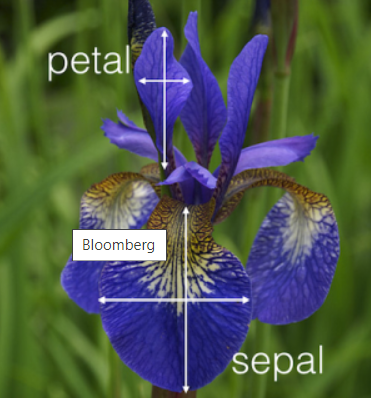

In [33]:
ifeatures.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
itarget.head()

,names
0,0
1,0
2,0
3,0
4,0


In [31]:
mapped = {0 :'setosa', 
          1 : 'versicolor',
          2 : 'virginica'}

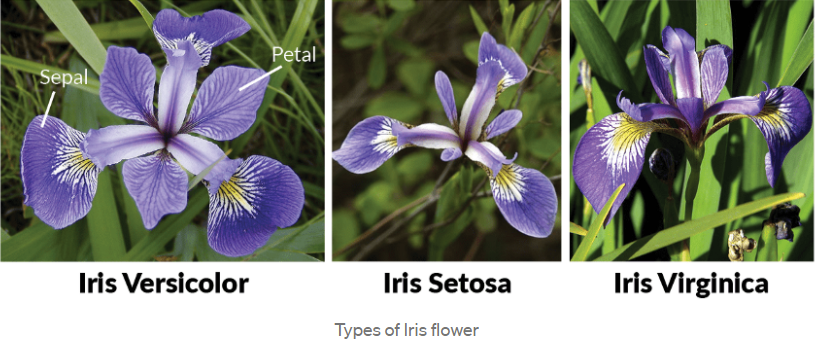

In [49]:
# split data into training and testing
iX_train, iX_test, iy_train, iy_test = train_test_split(ifeatures, itarget, random_state = 201)

In [72]:
iy_test

,names
84,1
94,1
40,0
69,1
36,0
93,1
86,1
51,1
128,2
7,0


In [52]:
iy_train = iy_train.values.flatten()

In [53]:
# create and run the model
iknn = KNeighborsClassifier(n_neighbors=1)
iknn.fit(X = iX_train, y = iy_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [58]:
# evaluate the accuracy
ipredicted = iknn.predict(X = iX_test)
iaccuracy = iknn.score(iX_test, iy_test)
print(f'Prediction accuracy on the test data: {iaccuracy * 100}')

Prediction accuracy on the test data: 92.10526315789474


In [70]:
# Verify accuracy
incorrect = 0

for iprediction in ipredicted:
  for i in iy_test:
    print(iy_test[i])
    if iprediction != iy_test[i]:
      incorrect += 1
      print(f'{incorrect}: {iprediction} {iy_test[i]}')

print(incorrect/len(ipredicted) * 100)

84     1
94     1
40     0
69     1
36     0
93     1
86     1
51     1
128    2
7      0
132    2
17     0
67     1
59     1
82     1
46     0
45     0
115    2
19     0
1      0
29     0
57     1
101    2
35     0
140    2
83     1
72     1
89     1
39     0
126    2
129    2
112    2
143    2
65     1
79     1
113    2
119    2
71     1
Name: names, dtype: int64


ValueError: ignored